In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("C:/Users/athar/Downloads/Iris/Social_Network_Ads.csv")

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().count()

User ID            400
Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

In [23]:
X=df.iloc[:,2:4].values
# print(X)
y=df.iloc[:,-1].values
# print(y)

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
lr=LogisticRegression(random_state=42)

In [27]:
standard=StandardScaler()
X_train=standard.fit_transform(X_train)
X_test=standard.transform(X_test)

In [28]:
lr.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [29]:
prediction=lr.predict(X_test)

In [30]:
print(prediction)

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0]


In [31]:
print(y_test)

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0
 1 0 1 1 0 1]


In [63]:
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



In [74]:
matrix=confusion_matrix(y_test,prediction,labels=lr.classes_)

tp,fn,fp,tn=confusion_matrix(y_test,prediction,labels=[1,0]).reshape(-1)
print(tp)

19


In [58]:
conf_matrix=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=lr.classes_)

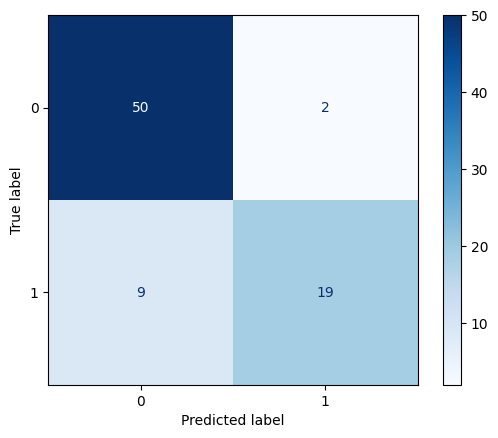

In [59]:
conf_matrix.plot(cmap=plt.cm.Blues)

In [3]:
accuracy=accuracy_score(y_test,y_pred)
print('\nAccuracy: ',accuracy)
print('Error Rate: ',(fp+fn)/(tp+tn+fn+fp))
print('Sensitivity (Recall or True positive rate) :',tp/(tp+fn))
print('Specificity (True negative rate) :',tn/(fp+tn))
print('Precision (Positive predictive value) :',tp/(tp+fp))
print('False Positive Rate :',fp/(tn+fp)